Introduction: Python + Machine Learning
=======================

This IPython notebook is public, can be used freely and was created only for demonstration purposes.
Please pack any error or mistake you encounter and carefully mail it to <a href=mailto:stefan.dun@gmail.com>stefan.dun@gmail.com</a> or contact me on <a href="https://plus.google.com/+StefanDunkler/">Google Plus</a>, where you can also ask questions.

What this notebook does:
* It takes the widely used iris dataset.
* It divides the dataset into random samples of test and training data
* It fits the data to a simple linear model
* It predicts the outcomes of the test data and calculates the score
* It iterates through the different parameters and does above things for every combination of parameters



We take the following modules from the scikit-learn package: (http://scikit-learn.org/stable/)
* We need a dataset: We take one of the data sets that comes with scikit-learn
* We need to model our data set: linear_model
* We need to cross validate our prediction: cross_validation

* We need a plotting library: matplotlib is the python package for beautiful data visualization. (http://matplotlib.org/)
* We need a data analysis library: Pandas (http://pandas.pydata.org/)

The following code imports all the necessary python modules for this demonstration:

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn import linear_model
from sklearn import cross_validation

import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

The next part is where we load the iris dataset and prepare it in a pandas data frame. Also, we print it in order to get familiar with its shape and get a feeling for its content. We see that there are three types of irises: 0, 1, 2. In this example we want only two possible outcomes. Therefore we remove type 1 from our data set.

In [2]:

iris = datasets.load_iris()
columns = iris.feature_names
dataframe= pd.DataFrame(iris.data, columns=columns)
dataframe['name'] = (iris.target)
data = dataframe[columns][dataframe["name"] != 1]
target = dataframe["name"][dataframe["name"] != 1]


In [3]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


These few lines of code take care of the machine learning part:
* For reusability they are embedded in a python function.
* Below the function definition is the doc string which explains what the code does.

In [4]:
def learn_it(parameter1, parameter2):
    '''
    Here, the scikit-learn magic happens. A simple 2 dimensional model is defined
    and a fit on a training subset is performed. It is scored to the training subset,
    in order to determine how well the model has performed.
    Also, the slope and intercept of the line from the fit result is returned.
    '''
    X, X_test, y, y_test = cross_validation.train_test_split(
            data[[parameter1, parameter2]],
            target,
            test_size=0.1,
            random_state=0)
    model = linear_model.LogisticRegression()
    model.fit(X, y)
    y_prediction = model.predict(X_test)
    slope = -model.coef_[0][0]/model.coef_[0][1]
    intercept = -model.intercept_/model.coef_[0][1]
    score = model.score(X_test, y_test)
    return (y_prediction, score, slope, intercept)


Here is another function, that does all the plotting:
* First we prepare the data.
* Then we plot the 0 irises with cyan dots ('co').
* We plot the "2" irises with magenta triangles ('mv').
* We plot the line from the linear fit.

In [5]:
def plot_it(parameter1, parameter2, slope, intercept, score):
    '''
    Plot the data!
    '''
    plt.figure(figsize=(6,4))
    x_values1 = data[dataframe["name"] == 0][parameter1]
    y_values1 = data[dataframe["name"] == 0][parameter2]
    x_values2 = data[dataframe["name"] == 2][parameter1]
    y_values2 = data[dataframe["name"] == 2][parameter2]
    x_min = min(x_values1.min(), x_values2.min())
    x_max = max(x_values1.max(), x_values2.max())
#     y_min = min(y_values1.min(), y_values2.min())
#     y_max = max(y_values1.max(), y_values2.max())
    plt.plot(x_values1, y_values1, 'co')  # plot data of a certain type of iris
    plt.plot(x_values2, y_values2 ,'mv')  # plot data of another type of iris
    plt.plot([x_min, x_max], [slope*x_min+intercept, slope*x_max+intercept]) # plot the discriminating line
    plt.legend([parameter1, parameter2, "model"], loc="lower right")
    plt.title("Iris Discriminator: Types:" + str(0) + " and " + str(2))
    facecolor = 'green' # green indicator
    if score < 0.5:
        facecolor = 'red'  # if score is low: red indicator
    plt.text(0.1, 0.9, "Score: " + str(score), horizontalalignment='center',
             verticalalignment='center',
             transform=plt.axes().transAxes,
             bbox=dict(facecolor=facecolor, alpha=0.3))
    plt.xlabel(parameter1)
    plt.ylabel(parameter2)
    plt.tight_layout()
    plt.show()


In the following function, we iterate over all different combinations that 4 parameters allow in two dimensions and call the learn_it function above to apply the model and plot the data afterwards.

Then we call the function and see the (honestly not as beautifully tweaked as I wanted) plots visualizing the results.

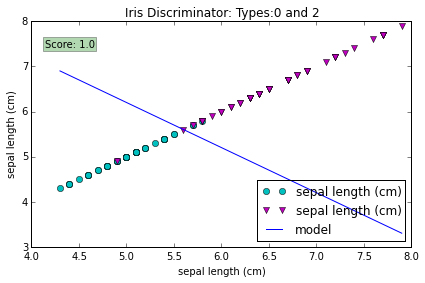

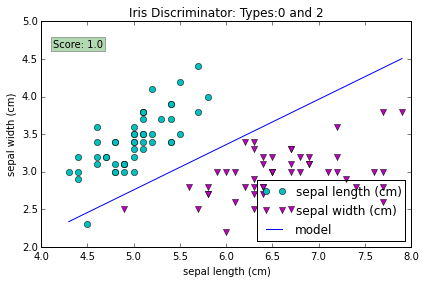

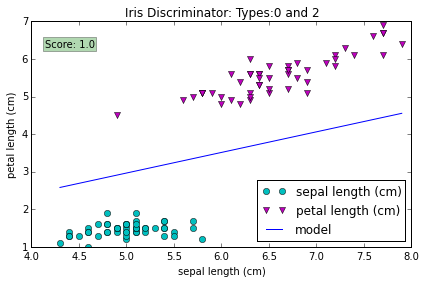

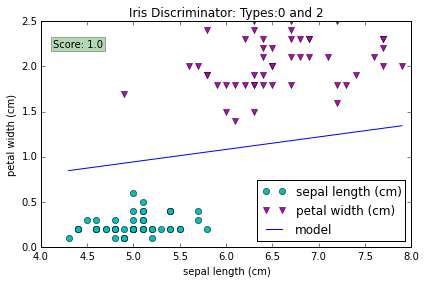

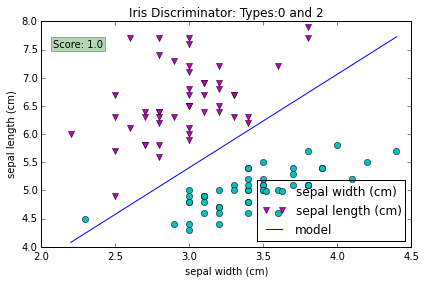

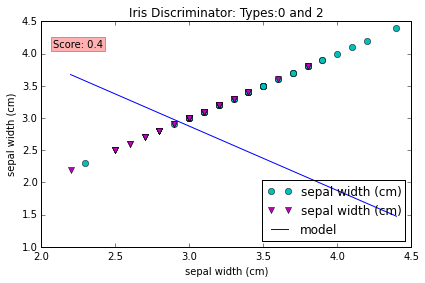

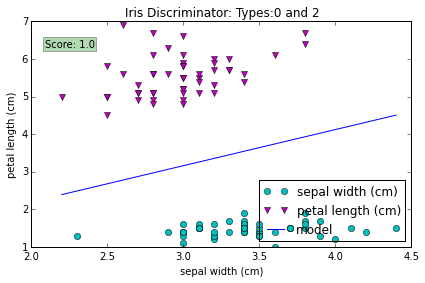

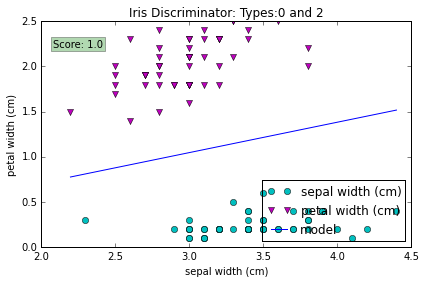

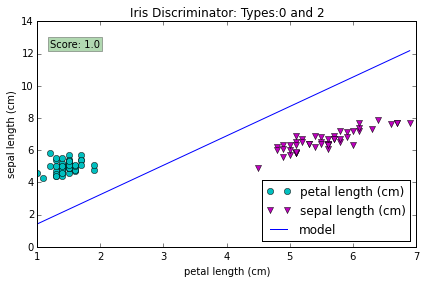

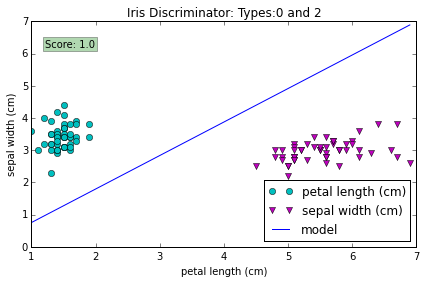

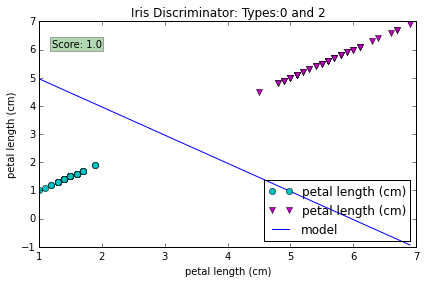

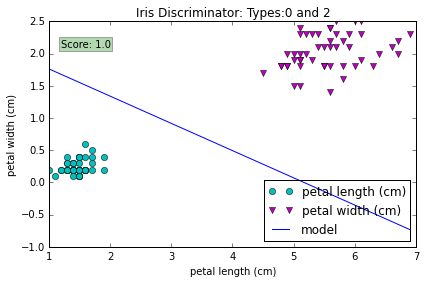

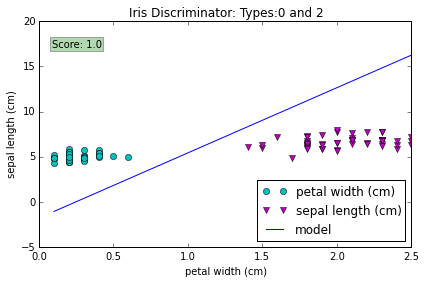

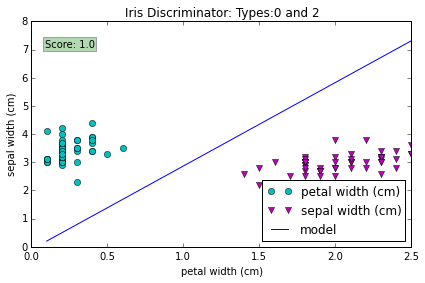

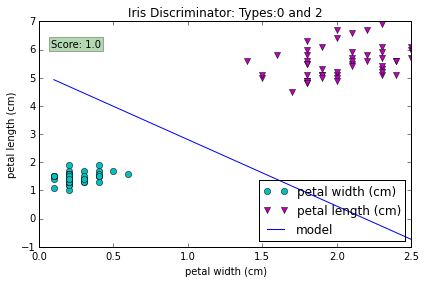

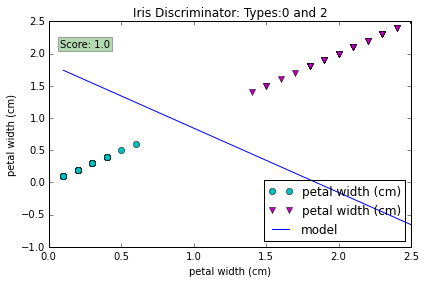

In [6]:
def do_it():   # main function
    for parameter1 in columns:
        for parameter2 in columns:
            (y_prediction, score, slope, intercept) = learn_it(parameter1, parameter2)
            plot_it(parameter1, parameter2, slope, intercept, score)

# actually do it:
do_it()
